In [34]:
# pandas 라이브러리 호출
import pandas as pd

In [35]:
# 코로나 데이터(csv)를 pandas 라이브러리로 읽어오기
raw_df = pd.read_csv("C:\\data\\owid-covid-data.csv")

In [36]:
# 필요컬럼(iso 코드, 국가, 날짜, 확진자 수, 인구수) 선택
selected_columns = ["iso_code", "location", "date", "total_cases", "population"]
# 코로나 데이터에서 필요컬럼만 추출
revised_df = raw_df[selected_columns]
revised_df.head()

,iso_code,location,date,total_cases,population
0,AFG,Afghanistan,2020-02-24,5.0,39835428.0
1,AFG,Afghanistan,2020-02-25,5.0,39835428.0
2,AFG,Afghanistan,2020-02-26,5.0,39835428.0
3,AFG,Afghanistan,2020-02-27,5.0,39835428.0
4,AFG,Afghanistan,2020-02-28,5.0,39835428.0


In [37]:
# 국가 컬럼 데이터만 추출
locations = revised_df["location"]
locations

0         Afghanistan
1         Afghanistan
2         Afghanistan
3         Afghanistan
4         Afghanistan
             ...     
192296       Zimbabwe
192297       Zimbabwe
192298       Zimbabwe
192299       Zimbabwe
192300       Zimbabwe
Name: location, Length: 192301, dtype: object

In [38]:
# 국가 확인
locations.unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

In [39]:
# 국가가 한국인 행만 추출
kor_df = revised_df[revised_df.location == "South Korea"]
# 국가가 미국인 행만 추출
usa_df = revised_df[revised_df.location == "United States"]
# 국가가 프랑스인 행만 추출
fra_df = revised_df[revised_df.location == "France"]
# 국가가 영국인 행만 추출
gbr_df = revised_df[revised_df.location == "United Kingdom"]
# 국가가 폴란드인 행만 추출
pol_df = revised_df[revised_df.location == "Poland"]

In [40]:
# 한국 데이터에서 date 컬럼을 인덱스로 설정
kor_date_index_df = kor_df.set_index("date")
# 미국 데이터에서 date 컬럼을 인덱스로 설정
usa_date_index_df = usa_df.set_index("date")
# 프랑스 데이터에서 date 컬럼을 인덱스로 설정
fra_date_index_df = fra_df.set_index("date")
# 영국 데이터에서 date 컬럼을 인덱스로 설정
gbr_date_index_df = gbr_df.set_index("date")
# 폴란드 데이터에서 date 컬럼을 인덱스로 설정
pol_date_index_df = pol_df.set_index("date")

In [41]:
# 한국 데이터에서 확진자수 컬럼만 추출
kor_total_cases = kor_date_index_df["total_cases"]
# 미국 데이터에서 확진자수 컬럼만 추출
usa_total_cases = usa_date_index_df["total_cases"]
# 프랑스 데이터에서 확진자수 컬럼만 추출
fra_total_cases = fra_date_index_df["total_cases"]
# 영국 데이터에서 확진자수 컬럼만 추출
gbr_total_cases = gbr_date_index_df["total_cases"]
# 폴란드 데이터에서 확진자수 컬럼만 추출
pol_total_cases = pol_date_index_df["total_cases"]

In [42]:
# 2020-03-04 기준 한국 인구수 추출
kor_population = kor_date_index_df['population']['2020-03-04']
# 2020-03-04 기준 미국 인구수 추출
usa_population = usa_date_index_df['population']['2020-03-04']
# 2020-03-04 기준 프랑스 인구수 추출
fra_population = fra_date_index_df['population']['2020-03-04']
# 2020-03-04 기준 영국 인구수 추출
gbr_population = gbr_date_index_df['population']['2020-03-04']
# 2020-03-04 기준 폴란드 인구수 추출
pol_population = pol_date_index_df['population']['2020-03-04']

In [43]:
# 한국을 기준으로 한국과 미국의 인구수 비율 계산
ku_rate = round((kor_population / usa_population), 2)
# 한국을 기준으로 한국과 프랑스의 인구수 비율 계산
kf_rate = round((kor_population / fra_population), 2)
# 한국을 기준으로 한국과 영국의 인구수 비율 계산
kg_rate = round((kor_population / gbr_population), 2)
# 한국을 기준으로 한국과 폴란드의 인구수 비율 계산
kp_rate = round((kor_population / pol_population), 2)

In [44]:
# 시각화용 데이터 생성
final_revised_df = pd.DataFrame({
    'KOR': kor_total_cases,
    'USA' : usa_total_cases * ku_rate,     # 한국과 미국의 인구수 차이를 없애기 위해 비율값을 곱함
    'FRA' : fra_total_cases * kf_rate,     # 한국과 프랑스의 인구수 차이를 없애기 위해 비율값을 곱함
    'GBR' : gbr_total_cases * kg_rate,     # 한국과 영국의 인구수 차이를 없애기 위해 비율값을 곱함
    'POL' : pol_total_cases * kp_rate,     # 한국과 폴란드의 인구수 차이를 없애기 위해 비율값을 곱함
    }, index = kor_date_index_df["2020-01-22" : ].index)     #2020-01-22 부터 끝 데이터까지 범위 지정

<Axes: xlabel='date'>

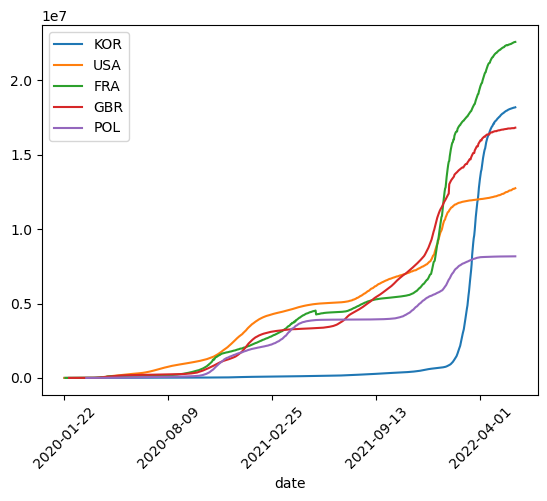

In [45]:
# plot.line 함수를 사용하여 데이터 시각화
final_revised_df.plot.line(rot=45)